In [167]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from ml4comm.qam_awgn import generate_symbols
from ml4comm.qam_analyzer import plot_decision_boundary, ser, plot_confusion_matrix
from ml4comm.plot import plot_symbols
from ml4comm.symbols import setup_channel, generate_dataset

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
channel_type      = 'crazy' # 'awgn' or 'crazy'
M                 = 16      # QAM modulation
train_size        = 600
num_symbols       = 3000 + train_size # Number of transmitted symbols
SNR_dB            = 15      # Signal to noise ratio in dB     
code_rate         = 1       # Rate of the used code
Es                = 1       # Average symbol energy

NUM_THREADS       = -1 # use all available threads
MAX_ERROR_RATE    = 0.03 if channel_type == 'awgn' else 0.02 # Max error rate: 3%

# Model Parameters
KNN_NUM_NEIGHBORS = 11 # Number of neighbors to use
KNN_ALGORITHM     = 'kd_tree' # Better than brute force for low dimensional data
KNN_WEIGHT        = 'distance' # Weight points by the inverse of their distance

In [169]:
def classification_workflow(model):
  symbs, indexes = generate_symbols(num_symbols, M) # Generate the QAM symbols
  channel_output = setup_channel(channel_type,symbs,code_rate,Es,SNR_dB)
  [X_train, X_test, y_train, y_test] = generate_dataset(channel_output,indexes)
  clf = model.fit(X_train, y_train) 
  return ser(clf, X_test, y_test)

def print_accuracy(ser_array: np.ndarray, threshold: float):
  arr = np.where(ser_array <= threshold, 1, 0)
  accuracy = np.sum(arr)/ser_array.size
  mean = np.mean(ser_array)
  std = np.std(ser_array)

  print('-----Resumo-----')
  for index in range(0, ser_array.size):
    print(f'Rodada {index+1} | {ser_array[index]:.2%}')

  print(f'\nResultados dentro do limite de {MAX_ERROR_RATE:.2%}: {accuracy:.2%} ou {int(accuracy/0.03030303)}/{ser_array.size}.\nErro médio: {mean:.2%}\nDesvio Padrão: {std:.2%}')

In [170]:
symbs, indexes = generate_symbols(num_symbols, M) # Generate the QAM symbols
channel_output = setup_channel(channel_type,symbs,code_rate,Es,SNR_dB)
[X_train, X_test, y_train, y_test] = generate_dataset(channel_output,indexes)

## Classifier

### K-nearest neighbors

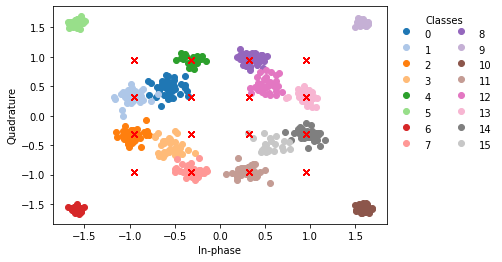

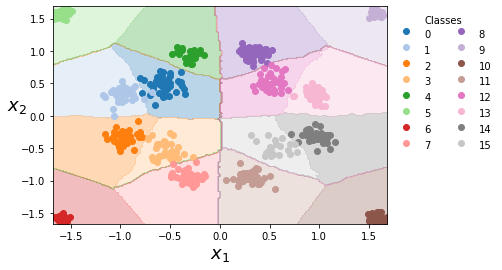

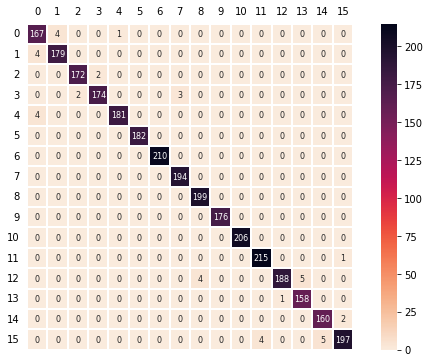

In [171]:
clf_KNN = KNeighborsClassifier(n_neighbors=KNN_NUM_NEIGHBORS,algorithm=KNN_ALGORITHM,weights=KNN_WEIGHT,n_jobs=NUM_THREADS).fit(X_train, y_train)
plot_symbols(X_train, y_train, symbs, QAM_modulation=M)
plot_decision_boundary(clf_KNN, X_train, y_train, legend=True)
plot_confusion_matrix(clf_KNN, X_test, y_test, M)

In [172]:
clf_KNN = KNeighborsClassifier(n_neighbors=KNN_NUM_NEIGHBORS,algorithm=KNN_ALGORITHM,weights=KNN_WEIGHT,n_jobs=NUM_THREADS)
sers = [classification_workflow(clf_KNN) for x in range(33)]
sers = np.array(sers)
print_accuracy(sers, MAX_ERROR_RATE)

-----Resumo-----
Rodada 1 | 1.53%
Rodada 2 | 1.43%
Rodada 3 | 1.13%
Rodada 4 | 1.57%
Rodada 5 | 1.33%
Rodada 6 | 1.13%
Rodada 7 | 1.57%
Rodada 8 | 1.13%
Rodada 9 | 1.30%
Rodada 10 | 1.97%
Rodada 11 | 1.30%
Rodada 12 | 1.53%
Rodada 13 | 1.13%
Rodada 14 | 1.50%
Rodada 15 | 1.43%
Rodada 16 | 1.40%
Rodada 17 | 1.20%
Rodada 18 | 1.83%
Rodada 19 | 1.23%
Rodada 20 | 1.30%
Rodada 21 | 1.40%
Rodada 22 | 1.10%
Rodada 23 | 1.20%
Rodada 24 | 1.37%
Rodada 25 | 1.53%
Rodada 26 | 1.53%
Rodada 27 | 1.10%
Rodada 28 | 1.53%
Rodada 29 | 1.33%
Rodada 30 | 1.37%
Rodada 31 | 1.20%
Rodada 32 | 1.33%
Rodada 33 | 1.67%

Resultados dentro do limite de 2.00%: 100.00% ou 33/33.
Erro médio: 1.38%
Desvio Padrão: 0.20%


### Naive Bayes

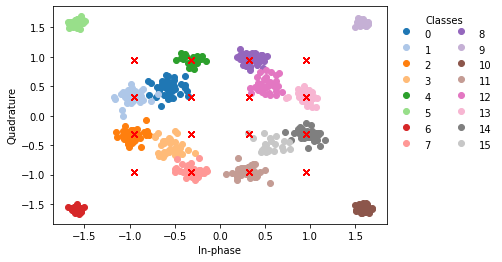

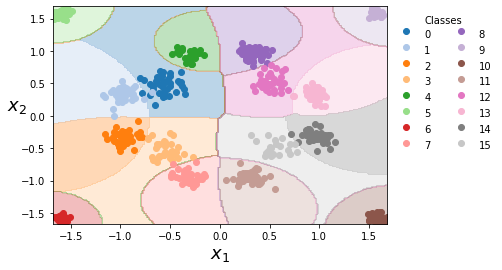

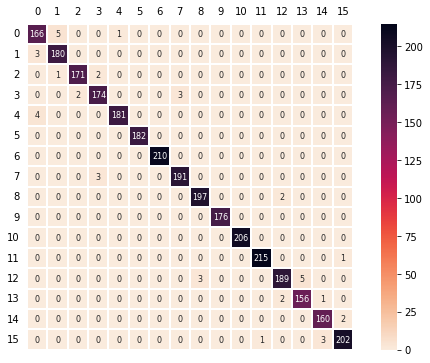

In [173]:
clf_NV = GaussianNB().fit(X_train, y_train)
plot_symbols(X_train, y_train, symbs, QAM_modulation=M)
plot_decision_boundary(clf_NV, X_train, y_train, legend=True)
plot_confusion_matrix(clf_NV, X_test, y_test, M)

In [174]:
clf_NV = GaussianNB()
sers = [classification_workflow(clf_NV) for x in range(33)]
sers = np.array(sers)
print_accuracy(sers, MAX_ERROR_RATE)

-----Resumo-----
Rodada 1 | 1.53%
Rodada 2 | 1.30%
Rodada 3 | 1.43%
Rodada 4 | 1.20%
Rodada 5 | 1.17%
Rodada 6 | 1.50%
Rodada 7 | 1.17%
Rodada 8 | 1.33%
Rodada 9 | 1.30%
Rodada 10 | 1.33%
Rodada 11 | 1.50%
Rodada 12 | 1.23%
Rodada 13 | 1.27%
Rodada 14 | 1.10%
Rodada 15 | 1.60%
Rodada 16 | 0.87%
Rodada 17 | 1.07%
Rodada 18 | 1.40%
Rodada 19 | 1.33%
Rodada 20 | 1.50%
Rodada 21 | 1.23%
Rodada 22 | 1.00%
Rodada 23 | 1.43%
Rodada 24 | 1.33%
Rodada 25 | 1.07%
Rodada 26 | 1.43%
Rodada 27 | 1.27%
Rodada 28 | 1.57%
Rodada 29 | 1.23%
Rodada 30 | 1.30%
Rodada 31 | 1.67%
Rodada 32 | 1.37%
Rodada 33 | 1.17%

Resultados dentro do limite de 2.00%: 100.00% ou 33/33.
Erro médio: 1.31%
Desvio Padrão: 0.18%
